In [2]:
import pandas as pd

df = pd.read_csv("../Data/advertising.csv")
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
import numpy as np

x = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

x.shape, y.shape

((200, 3), (200,))

In [4]:
# Scale features
x = (x - x.mean(axis=0)) / x.std(axis=0)

# Scale target variable
y = (y - y.mean()) / y.std()

n_samples, n_features = x.shape
x_bias = np.c_[np.ones((n_samples, 1)), x]

weights = np.zeros(x_bias.shape[1])

In [5]:
epochs = 100  # Increasing epochs for better convergence
learning_rate = 0.01   # Increasing learning rate

Batch

In [6]:
def batch_gradient_descent(x, y, lr, epochs):
    weights = np.zeros(x.shape[1])
    for epoch in range(epochs):
        predictions = x @ weights
        error = predictions - y
        gradient = (2 / len(y)) * x.T @ error
        weights -= lr * gradient

        if (epoch + 1) % 10 == 0 or epoch == 0:
            mse = np.mean(error ** 2)
            print(f"[Batch] Epoch {epoch+1}: MSE = {mse:.4f}")
    return weights

Online

In [7]:
def stochastic_gradient_descent(x, y, lr, epochs):
    weights = np.zeros(x.shape[1])
    for epoch in range(epochs):
        for i in range(len(y)):
            xi = x[i]
            yi = y[i]
            prediction = np.dot(xi, weights)
            error = prediction - yi
            gradient = 2 * error * xi
            weights -= lr * gradient

        if (epoch + 1) % 10 == 0 or epoch == 0:
            predictions = x @ weights
            mse = np.mean((predictions - y) ** 2)
            print(f"[SGD] Epoch {epoch+1}: MSE = {mse:.4f}")
    return weights

Mini-batch

In [8]:
def mini_batch_gradient_descent(x, y, lr, epochs, batch_size=16,):
    weights = np.zeros(x.shape[1])
    n = len(y)

    for epoch in range(epochs):
        indices = np.arange(n)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for start in range(0, n, batch_size):
            end = start + batch_size
            xb = x_shuffled[start:end]
            yb = y_shuffled[start:end]
            predictions = xb @ weights
            error = predictions - yb
            gradient = (2 / len(yb)) * xb.T @ error
            weights -= lr * gradient

        if (epoch + 1) % 10 == 0 or epoch == 0:
            mse = np.mean((x @ weights - y) ** 2)
            print(f"[Mini-Batch] Epoch {epoch+1}: MSE = {mse:.4f}")
    return weights

In [9]:
print("\n--- Running Batch Gradient Descent ---")
w_batch = batch_gradient_descent(x_bias, y, learning_rate, epochs)
print("\nWeights from Batch Gradient Descent:", w_batch)

print("\n--- Running Stochastic Gradient Descent ---")
w_sgd = stochastic_gradient_descent(x_bias, y, learning_rate, epochs)
print("\nWeights from Stochastic Gradient Descent:", w_sgd)

print("\n--- Running Mini-Batch Gradient Descent ---")
w_minibatch = mini_batch_gradient_descent(x_bias, y, learning_rate, epochs, batch_size=16)
print("\nWeights from Mini-Batch Gradient Descent:", w_minibatch)

# Debug: Check shapes and fix weights if needed
print(f"\nDebugging shapes:")
print(f"x_bias shape: {x_bias.shape}")
print(f"w_batch shape: {w_batch.shape}")
print(f"w_sgd shape: {w_sgd.shape}")
print(f"w_minibatch shape: {w_minibatch.shape}")

# Fix weights to have correct dimension (add bias term if missing)
if len(w_batch) == 3:
    w_batch = np.insert(w_batch, 0, 0)  # Add bias term at the beginning
if len(w_sgd) == 3:
    w_sgd = np.insert(w_sgd, 0, 0)  # Add bias term at the beginning
if len(w_minibatch) == 3:
    w_minibatch = np.insert(w_minibatch, 0, 0)  # Add bias term at the beginning

print(f"\nAfter fixing:")
print(f"w_batch shape: {w_batch.shape}")
print(f"w_sgd shape: {w_sgd.shape}")
print(f"w_minibatch shape: {w_minibatch.shape}")


--- Running Batch Gradient Descent ---
[Batch] Epoch 1: MSE = 1.0000
[Batch] Epoch 10: MSE = 0.7118
[Batch] Epoch 20: MSE = 0.5000
[Batch] Epoch 30: MSE = 0.3626
[Batch] Epoch 40: MSE = 0.2729
[Batch] Epoch 50: MSE = 0.2140
[Batch] Epoch 60: MSE = 0.1753
[Batch] Epoch 70: MSE = 0.1496
[Batch] Epoch 80: MSE = 0.1325
[Batch] Epoch 90: MSE = 0.1211
[Batch] Epoch 100: MSE = 0.1135

Weights from Batch Gradient Descent: [-2.43763343e-16  7.69280280e-01  2.59273170e-01  4.21817802e-02]

--- Running Stochastic Gradient Descent ---
[SGD] Epoch 1: MSE = 0.0981
[SGD] Epoch 10: MSE = 0.0987
[SGD] Epoch 20: MSE = 0.0987
[SGD] Epoch 30: MSE = 0.0987
[SGD] Epoch 40: MSE = 0.0987
[SGD] Epoch 50: MSE = 0.0987
[SGD] Epoch 60: MSE = 0.0987
[SGD] Epoch 70: MSE = 0.0987
[SGD] Epoch 80: MSE = 0.0987
[SGD] Epoch 90: MSE = 0.0987
[SGD] Epoch 100: MSE = 0.0987

Weights from Stochastic Gradient Descent: [ 0.00695954  0.88835316  0.32099907 -0.03529631]

--- Running Mini-Batch Gradient Descent ---
[Mini-Batch] 

In [10]:
def evaluate_model(x, y, weights, model_name):
    predictions = x @ weights
    mse = np.mean((y - predictions) ** 2)
    
    # Calculate R-squared
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - predictions) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    print(f"\n{model_name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r_squared:.4f}")
    return mse, r_squared

# Evaluate all three models
print("=== Model Evaluation ===")
mse_batch, r2_batch = evaluate_model(x_bias, y, w_batch, "Batch Gradient Descent")
mse_sgd, r2_sgd = evaluate_model(x_bias, y, w_sgd, "Stochastic Gradient Descent")
mse_mini, r2_mini = evaluate_model(x_bias, y, w_minibatch, "Mini-Batch Gradient Descent")

# Create a comparison table
results = pd.DataFrame({
    'Method': ['Batch GD', 'SGD', 'Mini-Batch GD'],
    'MSE': [mse_batch, mse_sgd, mse_mini],
    'R-squared': [r2_batch, r2_sgd, r2_mini]
})

print("\nComparison Table:")
print(results.to_string(index=False))

=== Model Evaluation ===

Batch Gradient Descent Results:
Mean Squared Error: 0.1129
R-squared Score: 0.8871

Stochastic Gradient Descent Results:
Mean Squared Error: 0.0987
R-squared Score: 0.9013

Mini-Batch Gradient Descent Results:
Mean Squared Error: 0.0974
R-squared Score: 0.9026

Comparison Table:
       Method      MSE  R-squared
     Batch GD 0.112890   0.887110
          SGD 0.098695   0.901305
Mini-Batch GD 0.097424   0.902576


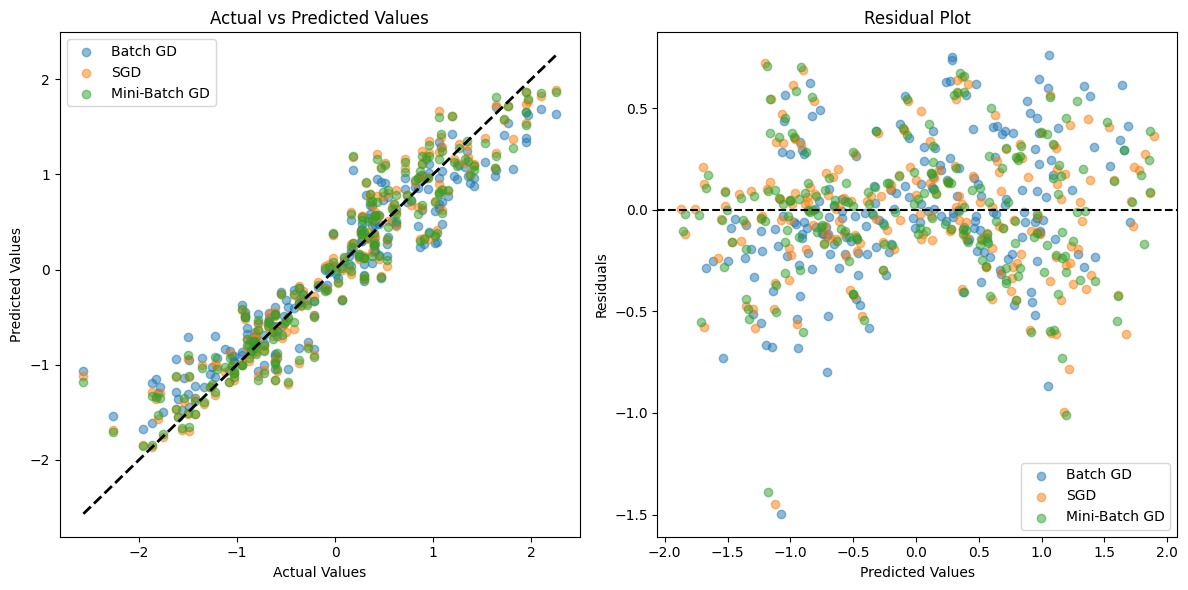

In [11]:
import matplotlib.pyplot as plt

# Get predictions from all models
predictions_batch = x_bias @ w_batch
predictions_sgd = x_bias @ w_sgd
predictions_mini = x_bias @ w_minibatch

# Create scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y, predictions_batch, alpha=0.5, label='Batch GD')
plt.scatter(y, predictions_sgd, alpha=0.5, label='SGD')
plt.scatter(y, predictions_mini, alpha=0.5, label='Mini-Batch GD')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Residual plots
plt.subplot(1, 2, 2)
plt.scatter(predictions_batch, y - predictions_batch, alpha=0.5, label='Batch GD')
plt.scatter(predictions_sgd, y - predictions_sgd, alpha=0.5, label='SGD')
plt.scatter(predictions_mini, y - predictions_mini, alpha=0.5, label='Mini-Batch GD')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

plt.tight_layout()
plt.show()